In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/detailed-shopping-by-product-supermarket/Compras2022.xlsx


In [2]:
df = pd.read_excel("/kaggle/input/detailed-shopping-by-product-supermarket/Compras2022.xlsx")

In [3]:
df.head()

,proveedor,fecha,tipo,numero,bodega,producto,descripcion,cant,unidad,vlrunit,total_siniva,iva_tasa,valor_iva,cuenta,precio_actual,precio_nuevo,saldo_actual,margen_bruto
0,CAMILO ANDRES JARAMILLO GORDILLO,2022-01-14,FC,28266,1,7704987009249,TINTE IRIS,12.0,UND,1716,20588,19,3912,14351601,2800.0,0.0,4.0,0
1,CAMILO ANDRES JARAMILLO GORDILLO,2022-01-14,FC,28266,1,5210,CANDELA CON EXTENSOR,25.0,UND,2286,57143,19,10857,14351601,4000.0,0.0,688.0,0
2,CAMILO ANDRES JARAMILLO GORDILLO,2022-01-14,FC,28266,1,7453088046287,SUPER GLUE *10G,12.0,UND,575,6900,0,0,14350101,900.0,0.0,133.0,0
3,CAMILO ANDRES JARAMILLO GORDILLO,2022-01-14,FC,28266,1,6984240170102,CINTA NEGRA AISLANTE,10.0,UND,886,8858,0,0,14350101,1200.0,0.0,3.0,0
4,CAMILO ANDRES JARAMILLO GORDILLO,2022-01-14,FC,28266,1,6946614108821,PEGANTE SMATPEGA *5GR,12.0,UND,263,3156,19,600,14351601,500.0,0.0,7.0,0


In [4]:
df.shape

(16383, 18)

In [5]:
df.describe()

,numero,cant,vlrunit,total_siniva,iva_tasa,valor_iva,cuenta,precio_actual,precio_nuevo,saldo_actual,margen_bruto
count,1.638300e+04,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,1.638300e+04,16378.000000,16378.000000,1.581000e+04,16383.0
mean,2.465965e+06,14.615445,4701.047916,4.386161e+04,13.663615,4189.371361,1.435119e+07,6691.086824,17.753694,8.059284e+04,0.0
std,1.090836e+08,28.994964,10482.810287,1.085276e+05,8.450720,11405.577963,6.719223e+02,11482.401970,1011.098776,8.149412e+05,0.0
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.435010e+07,0.000000,0.000000,-2.517504e+04,0.0
25%,2.320000e+02,4.000000,1256.000000,9.076000e+03,0.000000,0.000000,1.435010e+07,2000.000000,0.000000,4.000000e+00,0.0
50%,5.650000e+02,7.000000,2284.000000,2.000000e+04,19.000000,1748.000000,1.435160e+07,3500.000000,0.000000,3.700000e+01,0.0
75%,4.648900e+04,15.000000,4483.000000,4.320000e+04,19.000000,4416.500000,1.435160e+07,7000.000000,0.000000,9.810000e+02,0.0
max,6.225022e+09,2000.000000,206000.000000,4.057143e+06,19.000000,583891.000000,1.435301e+07,218100.000000,109480.000000,4.811964e+07,0.0


<AxesSubplot: >

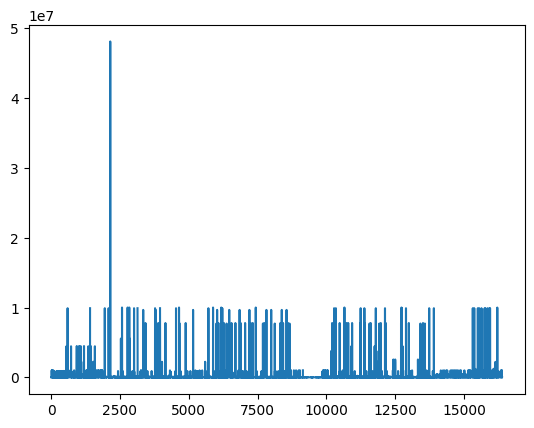

In [6]:
df['saldo_actual'].plot()

In [7]:
df.dropna(inplace=True)

In [8]:
for col in df:
    print(col, len(df[col].unique()))

proveedor 20
fecha 314
tipo 3
numero 988
bodega 1
producto 3711
descripcion 3706
cant 307
unidad 18
vlrunit 3179
total_siniva 4967
iva_tasa 3
valor_iva 3275
cuenta 5
precio_actual 420
precio_nuevo 3
saldo_actual 1025
margen_bruto 1


In [9]:
df.drop(labels=['bodega', 'margen_bruto', 'fecha'], inplace=True, axis=1)

In [10]:
for col in df:
    if df[col].dtype == 'object' or df[col].dtype == 'datetime64':
        df[col] = df[col].factorize()[0]

In [11]:
df.head()

,proveedor,tipo,numero,producto,descripcion,cant,unidad,vlrunit,total_siniva,iva_tasa,valor_iva,cuenta,precio_actual,precio_nuevo,saldo_actual
0,0,0,28266,0,0,12.0,0,1716,20588,19,3912,14351601,2800.0,0.0,4.0
1,0,0,28266,1,1,25.0,0,2286,57143,19,10857,14351601,4000.0,0.0,688.0
2,0,0,28266,2,2,12.0,0,575,6900,0,0,14350101,900.0,0.0,133.0
3,0,0,28266,3,3,10.0,0,886,8858,0,0,14350101,1200.0,0.0,3.0
4,0,0,28266,4,4,12.0,0,263,3156,19,600,14351601,500.0,0.0,7.0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'saldo_actual'], df['saldo_actual'], test_size=0.3)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt

clf = GradientBoostingRegressor()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

RMSE = 0

for i, entry in enumerate(preds):
    
    RMSE += abs(entry - y_test.iloc[i])**2
    
RMSE = sqrt(RMSE / y_test.shape[0])

print(RMSE)

548870.4603724346
